In [1]:
# Dataset was provided by CrowdSec.

# ## The code used to create test dataset
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Load the dataset
# df = pd.read_csv("dataset_v2/train.csv")  # Replace with your CSV file path

# # Split the dataset into training and test sets (e.g., 80% training, 20% test)
# train_df, test_df = train_test_split(
#     df, 
#     test_size=0.2,  # 20% of the data will be used for testing
#     random_state=42,  # Set a random seed for reproducibility
#     stratify=df["label"]  # Ensure the distribution of the target variable is maintained
# )

# # Save the training set to a CSV file
# train_df.to_csv("train_dataset.csv", index=False)

# # Save the test set to a CSV file
# test_df.to_csv("test_dataset.csv", index=False)

# print("Training dataset saved to 'train_dataset.csv'.")
# print("Test dataset saved to 'test_dataset.csv'.")

In [2]:
# # SAMPLING FOR SAVING COMPUTATION WHILE DEVELOPMENT!

# import pandas as pd
# # Sample the data for the initial coding
# df_train_sampled = pd.read_csv("train_dataset.csv").sample(frac=0.01, random_state=42)
# df_test_sampled = pd.read_csv("test_dataset.csv").sample(frac=0.01, random_state=42)

# # Save to disk
# df_train_sampled.to_csv("train_sampled.csv", index=False)
# df_test_sampled.to_csv("test_sampled.csv", index=False)

# print("Sampled data saved to disk.")


In [3]:
##### REPLACE THE SAMPLE DATASET WITH THE ACTUAL DATA AT THE END #####
import pandas as pd

# Load training data
# df_train = pd.read_csv("train_dataset.csv")
df_train = pd.read_csv("train_sampled.csv")

# Load test data
# df_test = pd.read_csv("test_dataset.csv")
df_test = pd.read_csv("test_sampled.csv")

In [4]:
# Print the training column names
print("Column Names:", list(df_train.columns))
# Print the first few lines
print("\nFirst 5 Rows of df_train:\n")
df_train.head()

Column Names: ['attack_time', 'watcher_country', 'watcher_as_num', 'watcher_as_name', 'attacker_country', 'attacker_as_num', 'attacker_as_name', 'attack_type', 'watcher_uuid_enum', 'attacker_ip_enum', 'label']

First 5 Rows of df_train:



,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-30T18:06:25Z,BE,34762,Combell NV,CN,45090.0,Shenzhen Tencent Computer Systems Company Limited,http:bruteforce,2018,56990,0
1,2023-08-07T05:51:24Z,US,32244,LIQUIDWEB,DO,272112.0,"TELECABLE DOMINICANO, S.A.",http:exploit,813,23453,0
2,2023-08-29T10:09:24Z,FI,24940,Hetzner Online GmbH,CN,4134.0,Chinanet,ssh:bruteforce,6006,132126,0
3,2023-08-07T06:29:52Z,US,30083,AS-30083-GO-DADDY-COM-LLC,JP,31898.0,ORACLE-BMC-31898,http:spam,8175,54977,0
4,2023-08-23T20:08:28Z,DK,51468,One.com A/S,DE,24940.0,Hetzner Online GmbH,http:spam,44008,89981,0


In [5]:
# Print the test column names
print("Column Names:", list(df_test.columns))
# Print the first few lines
print("\nFirst 5 Rows of df_test:\n")
df_test.head()

Column Names: ['attack_time', 'watcher_country', 'watcher_as_num', 'watcher_as_name', 'attacker_country', 'attacker_as_num', 'attacker_as_name', 'attack_type', 'watcher_uuid_enum', 'attacker_ip_enum', 'label']

First 5 Rows of df_train:



,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-08-24T12:52:27Z,US,46606,UNIFIEDLAYER-AS-1,US,14618.0,AMAZON-AES,http:scan,200,18008,0
1,2023-08-07T08:25:34Z,NL,21501,Host Europe GmbH,PH,132199.0,Globe Telecom Inc.,http:exploit,6809,77380,0
2,2023-08-19T13:50:21Z,US,14061,DIGITALOCEAN-ASN,ID,133800.0,PT Biznet Gio Nusantara,http:exploit,4083,60975,0
3,2023-08-02T12:01:40Z,DE,25394,MK Netzdienste GmbH & Co. KG,NO,12552.0,GlobalConnect AB,http:scan,4926,129164,0
4,2023-08-07T11:53:54Z,US,46606,UNIFIEDLAYER-AS-1,TR,211376.0,Kaan Girgin,http:exploit,12807,50804,0


In [6]:
# Check for NaN values in training and testing data
import numpy as np

# Check for NaN values in training data
if df_train.isna().any().any():
    print("Warning: df_train contains NaN values!")
else:
    print("No NaN values found in df_train!")

# Check for NaN values in testing data
if df_test.isna().any().any():
    print("Warning: df_test contains NaN values!")
else:
    print("No NaN values found in df_test.")

In [7]:
## Preprocessing


# Forward fill NaN values
df_train = df_train.ffill()
df_test = df_test.ffill()



# Categorical features that need encoding:

# watcher_country (Categorical: Country codes like "US", "IN")

# watcher_as_name (Categorical: ASN names like "IMH-IAD")

# attacker_country (Categorical: Country codes like "IN", "US")

# attacker_as_name (Categorical: ASN names like "DIGITALOCEAN-ASN", "GOOGLE-CLOUD-PLATFORM")

# attack_type (Categorical: Attack types like "http:spam", "http:exploit", "http:bruteforce")


# Numerical features that need scaling:

# watcher_as_num (Numeric: ASN numbers)

# attacker_as_num (Numeric: ASN numbers)

# attack_time (Possibly needs conversion to a numerical timestamp)

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define categorical and numerical features
categorical_features = [
    "watcher_country", "watcher_as_name", "attacker_country", "attacker_as_name", "attack_type"
]
numerical_features = ["watcher_as_num", "attacker_as_num", "attack_time"]

# Convert attack_time to timestamp if it's in datetime format
df_train["attack_time"] = pd.to_datetime(df_train["attack_time"], errors='coerce').astype(np.int64) // 10**9
df_test["attack_time"] = pd.to_datetime(df_test["attack_time"], errors='coerce').astype(np.int64) // 10**9

# OneHotEncoder for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ("cat", encoder, categorical_features),
    ("num", scaler, numerical_features)
])

# Fit the transformer on training data and transform both train and test sets
df_train_transformed = preprocessor.fit_transform(df_train)
df_test_transformed = preprocessor.transform(df_test)

In [8]:
# Retrieve correct feature names
ohe_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features).tolist()
num_feature_names = numerical_features  # Numerical features are not transformed by OneHotEncoder
train_columns = ohe_feature_names + num_feature_names

# Ensure the transformed data has the correct shape
print("Shape of df_train_transformed:", df_train_transformed.shape)
print("Shape of df_test_transformed:", df_test_transformed.shape)

# Convert to DataFrame
df_train_processed = pd.DataFrame(df_train_transformed.toarray(), columns=train_columns)
df_test_processed = pd.DataFrame(df_test_transformed.toarray(), columns=train_columns)

# Extract features and labels
X = df_train_processed.values.reshape(df_train_processed.shape[0], 1, df_train_processed.shape[1])
y = to_categorical(df_train["label"].values)

X_test = df_test_processed.values.reshape(df_test_processed.shape[0], 1, df_test_processed.shape[1])

# Split train set for validation with stratify
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Shape of df_train_transformed: (493037, 7288)
Shape of df_test_transformed: (123259, 7288)


In [9]:
# USING TENSORFLOW RNN MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense, Input

# Define RNN model
rnnmodel = Sequential([
    Input(shape=(1, X_train.shape[2])),  # Specify input shape here
    SimpleRNN(50, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(50, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])

# Compile model
rnnmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
rnnmodel.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=32)

Epoch 1/3
12326/12326 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9865 - loss: 0.0559 - val_accuracy: 0.9900 - val_loss: 0.0337
Epoch 2/3
12326/12326 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9908 - loss: 0.0300 - val_accuracy: 0.9906 - val_loss: 0.0321
Epoch 3/3
12326/12326 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9907 - val_loss: 0.0316


In [11]:
# USING TENSORFLOW GRU MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Input

# Define a GRU model
grumodel = Sequential([
    Input(shape=(1, X_train.shape[2])),  # Specify input shape here
    GRU(64, activation='relu', return_sequences=True),  # First GRU layer
    BatchNormalization(),  # Normalize the outputs
    Dropout(0.3),  # Dropout for regularization
    GRU(32, activation='relu'),  # Second GRU layer
    BatchNormalization(),  # Normalize the outputs
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),  # Additional dense layer
    Dense(y.shape[1], activation='softmax')  # Output layer
])

# Compile the model
grumodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = grumodel.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=32)

Epoch 1/3
12326/12326 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - accuracy: 0.9804 - loss: 0.0696 - val_accuracy: 0.9902 - val_loss: 0.0343
Epoch 2/3
12326/12326 ━━━━━━━━━━━━━━━━━━━━ 57s 5ms/step - accuracy: 0.9901 - loss: 0.0340 - val_accuracy: 0.9905 - val_loss: 0.0329
Epoch 3/3
12326/12326 ━━━━━━━━━━━━━━━━━━━━ 58s 5ms/step - accuracy: 0.9911 - loss: 0.0305 - val_accuracy: 0.9907 - val_loss: 0.0307


In [12]:
# USING PYTORCH RNN MODEL
# PYTORCH RNN MODEL DOESN'T HAVE PREDICT METHOD, SO WE'LL USE TENSORFLOW INSTEAD


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Ensure reproducibility
torch.manual_seed(42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the RNN model
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.rnn1 = nn.RNN(input_size, hidden_size, batch_first=True)
        self.dropout1 = nn.Dropout(0.2)
        self.rnn2 = nn.RNN(hidden_size, hidden_size, batch_first=True)
        self.dropout2 = nn.Dropout(0.2)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # First RNN layer
        out, _ = self.rnn1(x)
        out = self.dropout1(out)
        
        # Second RNN layer
        out, _ = self.rnn2(out)
        out = self.dropout2(out)
        
        # Only take the output from the last time step
        out = out[:, -1, :]
        
        # Fully connected layer
        out = self.fc(out)
        return out

# Initialize the model
input_size = X_train.shape[2]  # Number of features
hidden_size = 50  # Number of hidden units
output_size = y_train.shape[1]  # Number of output classes
prnnmodel = RNNModel(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(prnnmodel.parameters(), lr=0.001)

# Training loop
num_epochs = 3
for epoch in range(num_epochs):
    prnnmodel.train()  # Set model to training mode
    train_loss = 0.0
    
    for batch_X, batch_y in train_loader:
        # Forward pass
        outputs = prnnmodel(batch_X)
        loss = criterion(outputs, torch.argmax(batch_y, dim=1))  # CrossEntropyLoss expects class indices
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # Print training loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss/len(train_loader):.4f}")
    
    # Validation
    prnnmodel.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = prnnmodel(batch_X)
            loss = criterion(outputs, torch.argmax(batch_y, dim=1))
            val_loss += loss.item()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += batch_y.size(0)
            correct += (predicted == torch.argmax(batch_y, dim=1)).sum().item()
    
    # Print validation loss and accuracy
    print(f"Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {100 * correct / total:.2f}%")

Epoch [1/3], Training Loss: 0.0413
Validation Loss: 0.0367, Validation Accuracy: 98.93%
Epoch [2/3], Training Loss: 0.0324
Validation Loss: 0.0346, Validation Accuracy: 98.99%
Epoch [3/3], Training Loss: 0.0306
Validation Loss: 0.0334, Validation Accuracy: 99.01%


In [13]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = rnnmodel.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Get the true labels from the test set
y_true = df_test["label"].values

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

3852/3852 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step
Testing Accuracy: 99.15%


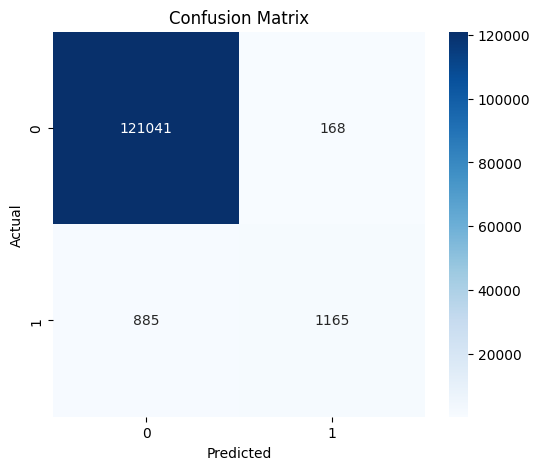

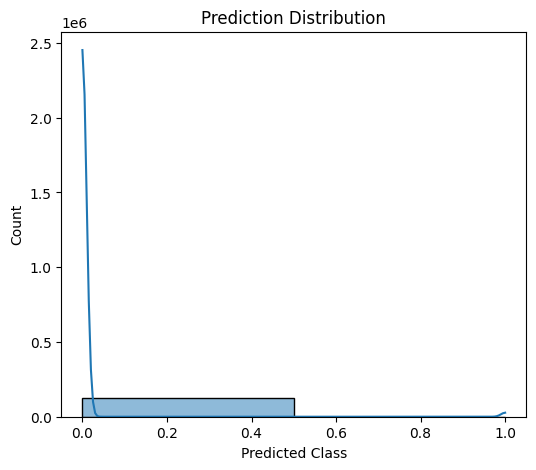

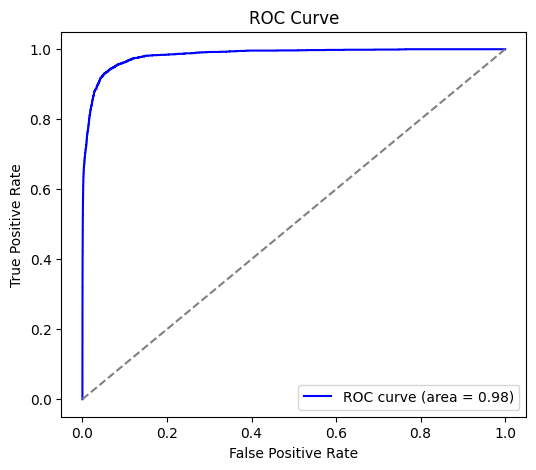

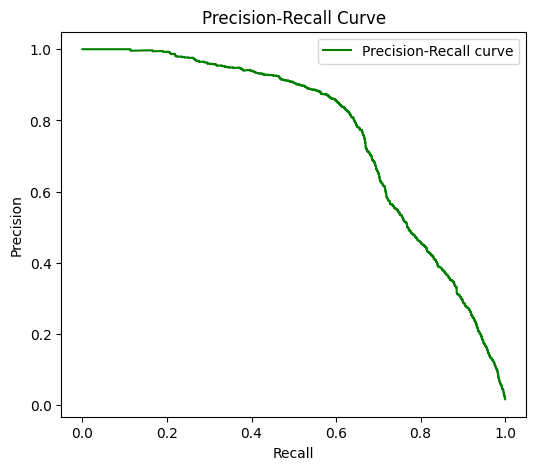

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    121209
           1       0.87      0.57      0.69      2050

    accuracy                           0.99    123259
   macro avg       0.93      0.78      0.84    123259
weighted avg       0.99      0.99      0.99    123259



In [16]:
# # Visualize and report (Confusion matrix, Prediction Distribution, ROC Curve, Precision-Recall Curve)
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Prediction Distribution
plt.figure(figsize=(6,5))
sns.histplot(y_pred_classes, bins=len(set(y_true)), kde=True)
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.title("Prediction Distribution")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_pred[:, 1])
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='green', label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))